In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [22]:
imdb = keras.datasets.imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data()


In [23]:
print(X_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 825

In [24]:
X_train.shape

(25000,)

In [25]:
X_test.shape

(25000,)

In [26]:
y_test[0]

0

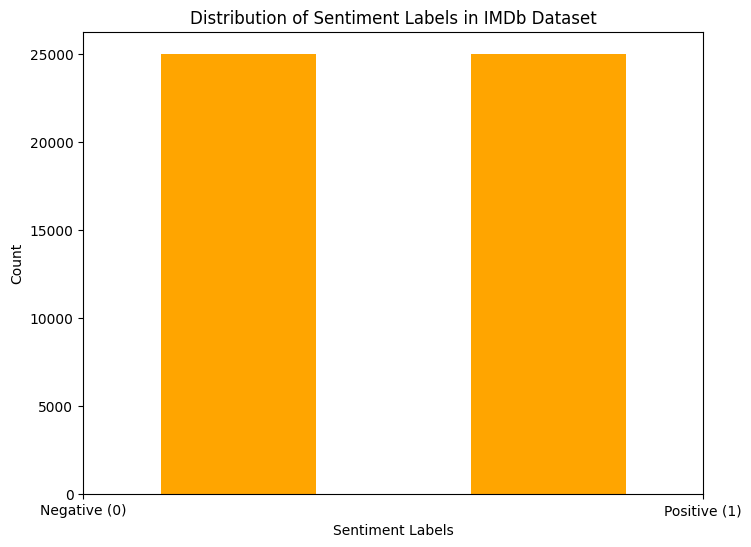

In [27]:
import matplotlib.pyplot as plt
import numpy as np


all_labels = np.concatenate([y_train, y_test])


plt.figure(figsize=(8, 6))
plt.hist(all_labels, bins=[0, 0.5, 1], align='mid', rwidth=0.5, color='orange')
plt.xticks([0, 1], ['Negative (0)', 'Positive (1)'])
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels in IMDb Dataset')
plt.show()

In [41]:
maxlen = 250
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [49]:
model = keras.Sequential([
    keras.layers.Embedding(input_dim=10000, output_dim=32, input_length=maxlen),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(128),
    keras.layers.Dense(1, activation='sigmoid')
])


In [50]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [51]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
313/313 [==============================] - 49s 144ms/step - loss: 0.7007 - accuracy: 0.5226 - val_loss: 0.6929 - val_accuracy: 0.5734
Epoch 2/5
313/313 [==============================] - 26s 84ms/step - loss: 0.6920 - accuracy: 0.5165 - val_loss: 0.6888 - val_accuracy: 0.4964
Epoch 3/5
313/313 [==============================] - 17s 53ms/step - loss: 0.6169 - accuracy: 0.6957 - val_loss: 0.4682 - val_accuracy: 0.7822
Epoch 4/5
313/313 [==============================] - 13s 43ms/step - loss: 0.4297 - accuracy: 0.8003 - val_loss: 0.3599 - val_accuracy: 0.8508
Epoch 5/5
313/313 [==============================] - 12s 38ms/step - loss: 0.2943 - accuracy: 0.8798 - val_loss: 0.4013 - val_accuracy: 0.8406


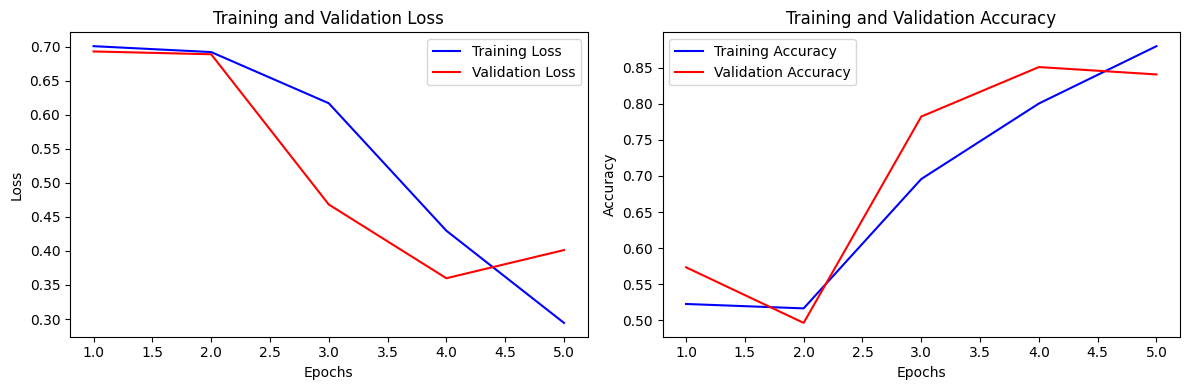

In [52]:
import matplotlib.pyplot as plt

# Extract training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [54]:
#lets make prediction
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

782/782 [==============================] - 8s 10ms/step - loss: 0.3967 - accuracy: 0.8432
Test accuracy: 84.32%
